## Netflix Data Analysis

In [3]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
data=pd.read_csv("C:\\Users\\HP\\Desktop\\netfix_analysis\\netflix_titles.csv")

In [7]:
data.shape #to show the no. of rows and columns 

(7787, 12)

In [5]:
data.size  #to show no of total elements in the dataset

93444

In [6]:
data.columns #to show the each column name

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
data.dtypes #to show the data type of each column

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

### Task1: Is there any duplicate record in the dataset? if yes then remove the duplicate records.

In [9]:
data[data.duplicated()] # to check row wise and detect the duplicate rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


### Task2: Is there any null value present in any column? 

In [10]:
data.isnull()  # To show where null value is present

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,False,False,False,False,False,False,False,False,False,False,False,False
7783,False,False,False,False,False,False,False,False,False,False,False,False
7784,False,False,False,True,False,True,False,False,False,False,False,False
7785,False,False,False,True,False,False,False,False,False,False,False,False


In [11]:
data.isnull().sum() # To show the count of null values in each columns

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

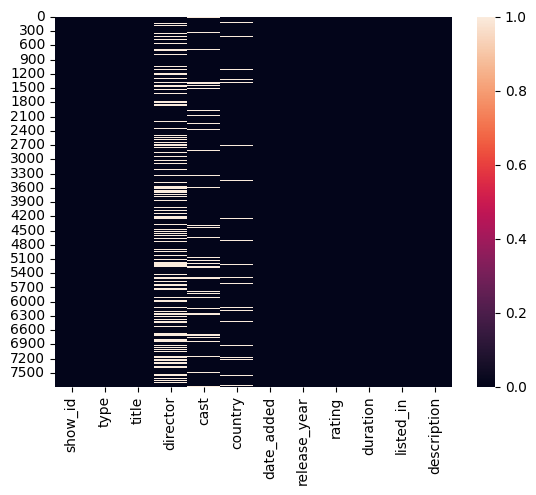

In [8]:
sns.heatmap(data.isnull())  #Show null values count using heatmap

### Q1. For "Kung Fu Panda: Holiday", what is the show id and who is the director of the movie?

In [3]:
data[data["title"].isin(["Kung Fu Panda: Holiday"])] #To show all records of a perticular item in any column

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3466,s3467,Movie,Kung Fu Panda: Holiday,Tim Johnson,"Jack Black, Angelina Jolie, Dustin Hoffman, Ja...",United States,"December 1, 2012",2010,TV-PG,26 min,"Children & Family Movies, Comedies","As preparations for the Winter Feast build, Po..."


In [4]:
# The show id is s3467 and the director of the movie is Tim Johnson

### Q2. In which year highest number of the TV shows and movies were released? Show with bar graph.

In [5]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
data["release"]=pd.to_datetime(data["date_added"],format='mixed')
data.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added              object
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
release         datetime64[ns]
dtype: object

In [24]:
data["release"].dt.year.value_counts()  # it counts the occurrency of all individual years 

release
2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: count, dtype: int64

<Axes: xlabel='release'>

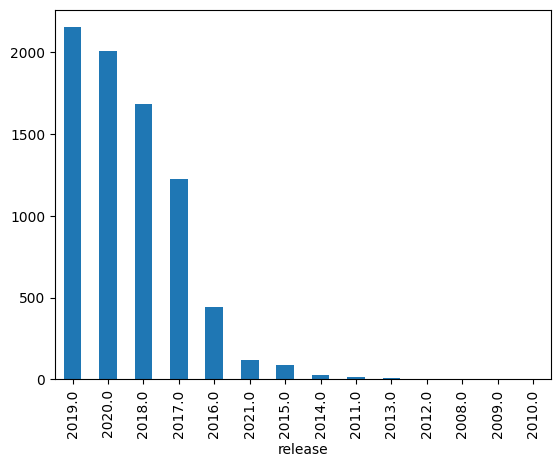

In [28]:
data["release"].dt.year.value__counts().plot(kind="bar")

### Q3. How many movies and TV shows are in the dataset?

In [12]:
data.groupby("type").type.count()  # To group all unique items of a column and show their count

type
Movie      5377
TV Show    2410
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

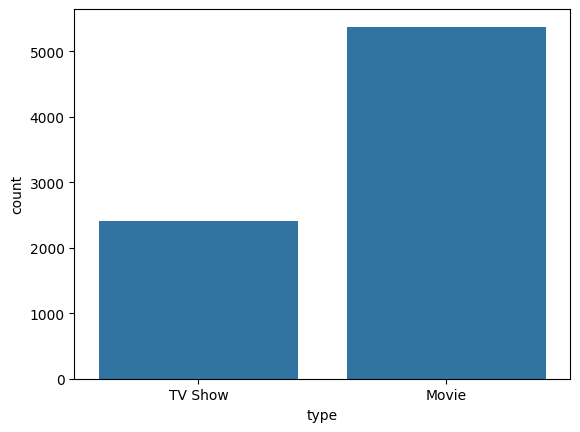

In [13]:
sns.countplot(x=data["type"]) 

### Q4. Show all the movies that were released in year 2010

In [13]:
data[(data["type"]=="Movie") & (data["release_year"]==2010)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release
42,s43,Movie,Çok Filim Hareketler Bunlar,Ozan Açıktan,"Ayça Erturan, Aydan Taş, Ayşegül Akdemir, Burc...",Turkey,"March 10, 2017",2010,TV-MA,99 min,"Comedies, International Movies",Vignettes of the summer holidays follow vacati...,2017-03-10
68,s69,Movie,14 Blades,Daniel Lee,"Donnie Yen, Zhao Wei, Wu Chun, Law Kar-Ying, K...","Hong Kong, China, Singapore","April 3, 2019",2010,R,113 min,"Action & Adventure, International Movies","In the age of the Ming Dynasty, Quinglong is t...",2019-04-03
272,s273,Movie,Aashayein,Nagesh Kukunoor,"John Abraham, Sonal Sehgal, Prateeksha Lonkar,...",India,"October 22, 2017",2010,TV-14,115 min,"Dramas, International Movies","When he learns he has terminal cancer, a cynic...",2017-10-22
274,s275,Movie,Aata Pita,Uttung Shelar,"Sanjay Narvekar, Bharat Jadhav, Satish Phuleka...",India,"January 1, 2018",2010,TV-14,133 min,"Comedies, Dramas, International Movies",A municipal clerk with literary ambitions stal...,2018-01-01
299,s300,Movie,Act of Vengeance,Mahsun Kırmızıgül,"Haluk Bilginer, Mahsun Kırmızıgül, Mustafa San...","Turkey, United States","September 29, 2018",2010,NR,112 min,"Action & Adventure, International Movies",Two Turkish agents are sent to New York City o...,2018-09-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7459,s7460,Movie,"Waiting for ""Superman""",Davis Guggenheim,NaN,United States,"September 7, 2020",2010,PG,111 min,Documentaries,This dynamic documentary weaves together stori...,2020-09-07
7496,s7497,Movie,We Are Family,Sidharth Malhotra,"Kajol, Kareena Kapoor, Arjun Rampal, Nominath ...","India, Australia","October 1, 2018",2010,TV-14,119 min,"Dramas, International Movies",A divorced mother of three children runs a hap...,2018-10-01
7604,s7605,Movie,Whitney Cummings: Money Shot,John Fortenberry,Whitney Cummings,United States,"January 1, 2019",2010,TV-MA,48 min,Stand-Up Comedy,Comedy Central roast veteran Whitney Cummings ...,2019-01-01
7638,s7639,Movie,Winter's Bone,Debra Granik,"Jennifer Lawrence, John Hawkes, Kevin Breznaha...",United States,"March 1, 2019",2010,R,100 min,"Dramas, Independent Movies","In this unflinching noir drama, a resilient te...",2019-03-01


### Q5. Show only the Titles of all TVshows that were released in India only

In [18]:
data[(data["type"]=="TV Show") & (data["country"]=="India")] ["title"]

86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                           Akbar Birbal
533                    Anjaan: Rural Myths
                       ...                
6248                  The Creative Indians
6398    The Golden Years with Javed Akhtar
6467                The House That Made Me
7292                            Typewriter
7703                       Yeh Meri Family
Name: title, Length: 71, dtype: object

### Q6. Show top 10 directors,who gave the highest number of TV shows and Movies to Netflix

In [22]:
data["director"].value_counts().head(10)

director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          10
David Dhawan               9
Ryan Polito                8
Name: count, dtype: int64

### Q7. In how many movies/shows, Tom Cruise was cast?

In [19]:
#creating new dataframe
data_new=data.dropna()   # it drops the rows that contains all or any missing values

data_new[data_new["cast"].str.contains("Tom Cruise")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,"January 1, 2020",1999,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020-01-01
5070,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"July 1, 2019",1988,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019-07-01


In [ ]:
# In two movies

### Q8. What are the different ratings defined by Netflix

In [34]:
data["rating"].nunique()  # to see how many unique values are there(the number of unique values)

14

In [35]:
data["rating"].unique()   #to see the name of the unique values

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

### Q9. How many Netflix Movies got the "PG-13" rating in India?

In [20]:
data[(data["type"]=="Movie") & (data["rating"]=="PG-13") & (data["country"]=="India")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release
100,s101,Movie,3 Idiots,Rajkumar Hirani,"Aamir Khan, Kareena Kapoor, Madhavan, Sharman ...",India,"August 1, 2019",2009,PG-13,164 min,"Comedies, Dramas, International Movies",While attending one of India's premier college...,2019-08-01
4264,s4265,Movie,Mubarakan,Anees Bazmee,"Anil Kapoor, Arjun Kapoor, Ileana D'Cruz, Athi...",India,"November 5, 2017",2017,PG-13,153 min,"Comedies, Dramas, International Movies",Chaos ensues after two orphaned twin brothers ...,2017-11-05
4733,s4734,Movie,Pad Man,R. Balki,"Akshay Kumar, Sonam Kapoor, Radhika Apte, Jyot...",India,"August 21, 2018",2018,PG-13,130 min,"Dramas, International Movies, Romantic Movies","Despite public humiliation and resistance, an ...",2018-08-21
4920,s4921,Movie,Poster Boys,Shreyas Talpade,"Sunny Deol, Bobby Deol, Shreyas Talpade, Sonal...",India,"November 27, 2017",2017,PG-13,128 min,"Comedies, International Movies",Three men are stunned to find their faces on a...,2017-11-27


In [ ]:
# There are 4 movies.

### Q10. How many TV shows got the "R" rating after year 2015?

In [34]:
data[(data["type"]=="TV Show") & (data["rating"]=="R") & (data["release_year"]>2015)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release
4497,s4498,TV Show,Nobel,NaN,"Aksel Hennie, Tuva Novotny, Anders Danielsen L...",Norway,"December 10, 2016",2016,R,1 Season,"International TV Shows, TV Dramas, TV Thrillers",A series of incidents in Afghanistan set compl...,2016-12-10


In [35]:
# Only one TV show got the "R" rating after year 2015

### Q11. Which individual country has the highest no. of TV shows?

In [78]:
data_tvshow=data[data["type"]=="TV Show"]

In [84]:
data_tvshow["country"].value_counts().head(1)

country
United States    705
Name: count, dtype: int64

In [ ]:
# United States has highest number of TV Shows.